In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('/content/Resume.csv.zip')

df.head()
print(df.columns)

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


In [3]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]


    return ' '.join(txt)

In [4]:
# preprocessing text
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))

LookupError: ignored

In [9]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_str'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

LookupError: ignored

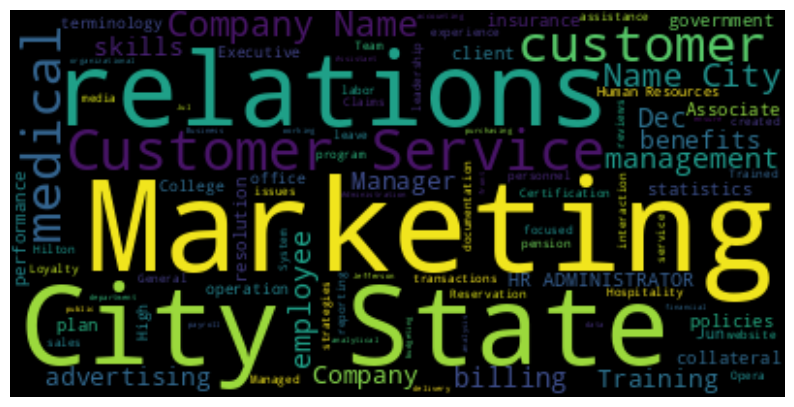

In [10]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [12]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ["Resume_str", 'Category']] for category in categories]
df_categories

[                                             Resume_str    Category
 1808           ACCOUNTANT       Professional Summary...  ACCOUNTANT
 1809           ACCOUNTANT       Summary      Innovat...  ACCOUNTANT
 1810           ACCOUNTANT         Highlights        ...  ACCOUNTANT
 1811           ACCOUNTANT           Professional Sum...  ACCOUNTANT
 1812           ACCOUNTANT       Summary    To pursue...  ACCOUNTANT
 ...                                                 ...         ...
 1921           GENERAL ACCOUNTANT       Professional...  ACCOUNTANT
 1922           STAFF ACCOUNTANT       Professional S...  ACCOUNTANT
 1923           GENERAL ACCOUNTANT           Summary ...  ACCOUNTANT
 1924           PROJECT ACCOUNTANT           Career F...  ACCOUNTANT
 1925           SENIOR ACCOUNTANT           Summary  ...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                             Resume_str  Category
 439           ADVOCATE         Professional Summary...  ADVOCATE
 440         

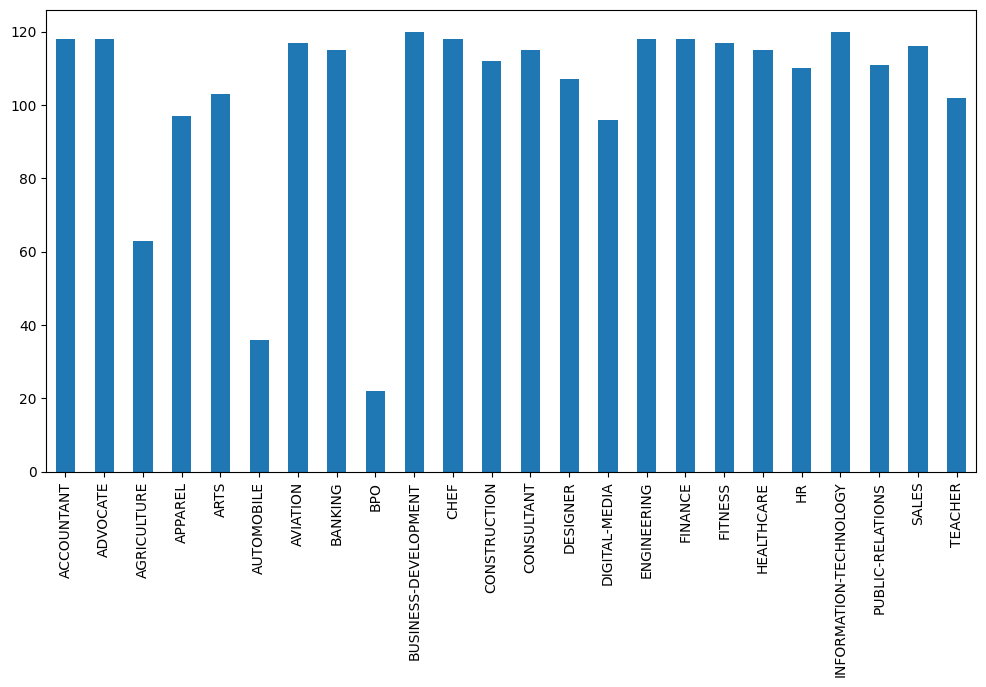

In [13]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [14]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [15]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

In [16]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [17]:
df.Category.value_counts()

20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: Category, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume_str'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [19]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(1987, 40236)
(497, 40236)


In [22]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * len(df))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

1987
497


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'to': 3, 'of': 4, 'the': 5, 'in': 6, 'for': 7, 'with': 8, 'a': 9, 'state': 10, 'city': 11, 'company': 12, 'management': 13, 'name': 14, 'on': 15, 'as': 16, 'all': 17, 'sales': 18, 'business': 19, 'customer': 20, 'skills': 21, '－': 22, 'by': 23, 'new': 24, 'service': 25, 'team': 26, 'development': 27, 'training': 28, 'experience': 29, 'project': 30, 'work': 31, 'i': 32, 'manager': 33, 'information': 34, 'marketing': 35, 'or': 36, 'that': 37, 'financial': 38, 'office': 39, 'support': 40, 'education': 41, 'including': 42, 'from': 43, 'staff': 44, 'at': 45, 'professional': 46, 'data': 47, 'system': 48, 'systems': 49, 'university': 50, 'process': 51, 'managed': 52, 'design': 53, 'quality': 54, 'customers': 55, 'developed': 56, 'an': 57, '\xa0': 58, 'clients': 59, 'client': 60, 'reports': 61, 'analysis': 62, 'operations': 63, 'product': 64, 'high': 65, 'program': 66, 'other': 67, 'services': 68, 'accounting': 69, 'microsoft': 70, '01': 71, '2014': 72, 'current': 73, 'acco

In [27]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[ 201  803   35  233  201  803  118  910   20   25   33    8  731  126
    4   29    6 1723    2   20   25   13 4580 2880    2  430    4   20
  597  305    1    3    1    9 1924 1602 2121    3   20   25  285  597
   15   20  337   26   13   35 2298 1045  487  439   28    2   27  671
  346 2299   60  124  247  265 3614 3961  379   28  524  257   23    1
    6   20 1880    2   35   23 3790    1 2725  143   33   28  524 1498
  969    7  500  317 1723   49  134   16    1    1    1    1    1    1
    1 4886   48    1    1  298  903    2 1373    6   20   25   18  221
   97  120  996 1442  119   81   13   90    2   85  780   29  201  803
   35  233  201  803 1398   79    3   73   12   14   22   11   10 4731
    3  168  128 4805    2 2592  108  134   16  757  856  807  124  352
   28    2  113   68 1982  113 5351 3315    2  237  207 5725  202    4
  352  137 1697  134   16  294    2 4887  187  174  479  134   16 1268
  787 1907   85  647    2 2618    2  113 1406    7  490  135    1   13
    6 

In [28]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459994 (1.75 MB)
Trainable params: 459994 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=8f78b98af32d317dcefcbd09e22595361e8090a6359058dd269ee4a787c4b9ef
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [31]:
from tika import parser

In [33]:
file = r'/content/Elan-Resume.pdf'
file_data = parser.from_file(file)

2023-10-30 12:15:50,006 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-10-30 12:15:54,532 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-10-30 12:15:55,821 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [34]:
text = file_data['content']
print(text)






































ELANGKUMARAN A
7598941453 • thunderelan175@gmail.com • https://www.linkedin.com/in/elangkumaran-a-277118256/ •

https://github.com/Elan3526

SUMMARY
Ambitious Computer Science Engineer pursuing third year, passionate about coding, algorithm design, and software
development. Adept at collaborating in team environments and driven to solve complex technical challenges. Eager to
contribute my skills and enthusiasm to a forward-thinking tech organization.

EDUCATION
B.E., Computer Science Engineering Graduating May 2025
8.3 GPA
PSNA College of Engineering and Technology
Relevant coursework: Data structures and Algorithms,Object Oriented Programming,Operating Systems.

TECHNICAL SKILLS
Data Analysis and Statistics: JMP, Minitab
Frontend tools: HTML,CSS,React(basics)
Backend tools: JavaScript
Programming: Python, C, C++,Java
Certifications: SQL(Basics),C,C++,Java

ACADEMIC PROJECTS
Android Application using Java 2023
Application that connects hotels and bi

In [35]:
parsed_content = {}

In [36]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
print(email)
parsed_content['E-mail'] = email

['thunderelan175@gmail.com', 'thunderelan175@gmail.com']


In [37]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
if len(phone_number) <= 10:
    print(phone_number)
    parsed_content['Phone number'] = phone_number

['7598941453', '2771182', '2771182']


In [38]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print(name)
parsed_content['Name'] =  name

ELANGKUMARAN A


In [42]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "TECHNICAL SKILLS",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "projects",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [43]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass

In [44]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

['TECHNICAL SKILLS']